<a href="https://www.nottingham.ac.uk/"><img src="https://www.nottingham.ac.uk/Brand/LegacyAssets/images-multimedia/Supporting/Logo/Video/third-party-logos.JPG" width="400" align="center"></a>

<h1><center>Data Processing Pipeline</center></h1>

<h2>About this Lab</h2><br>
This lab is designed to give you some practical experience with understanding data processing pipeline. We downloaded a dataset that is related to fuel consumption and carbon dioxide emission of cars.

Important note: Please note that you are not expected to know how to program in Python. The following code is meant to illustrate the stages of data processing, so it is totally fine if you do not understand the individual lines of code. There will be a full lesson on Python programming for Data Science, which will teach you how to process and analyise data in Python.

## Objectives

After completing this activity you will be able to understand a basic data processing pipeline:
- Explore dataset
- Missing data and data outliers
- Visualise the data
- Draw some conclusion


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.xls`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles. The dataset contains 100 observations and 9 features or variables as follows:

-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [2]:
# Loading Excel data using Pandas from URL
df = pd.read_excel("FuelConsumption.xlsx")

print("Data read into dataframe!")

# take a look at the first few rows of the dataset.
df.head()

Data read into dataframe!


,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ASTON MARTIN,DB9,5.9,12,18.0,12.6,15.6,18,359
1,ASTON MARTIN,RAPIDE,5.9,12,18.0,12.6,15.6,18,359
2,ASTON MARTIN,V8 VANTAGE,4.7,8,17.4,11.3,14.7,19,338
3,ASTON MARTIN,V8 VANTAGE,4.7,8,18.1,12.2,15.4,18,354
4,ASTON MARTIN,V8 VANTAGE S,4.7,8,17.4,11.3,14.7,19,338


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.


In [3]:
# Get the dimensions of the dataframe.
print(df.shape)


(99, 9)


## Missing data
The above output shows that there are 99 observations of 9 variables. All the variables have 600 records, indicating that there is no missing value in the data. 

In [4]:
# Get the information of the data structure.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      99 non-null     object 
 1   MODEL                     99 non-null     object 
 2   ENGINESIZE                99 non-null     float64
 3   CYLINDERS                 99 non-null     int64  
 4   FUELCONSUMPTION_CITY      99 non-null     float64
 5   FUELCONSUMPTION_HWY       99 non-null     float64
 6   FUELCONSUMPTION_COMB      99 non-null     float64
 7   FUELCONSUMPTION_COMB_MPG  99 non-null     int64  
 8   CO2EMISSIONS              99 non-null     int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.1+ KB
None


Lets select some features to explore more.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,5.9,12,15.6,359
1,5.9,12,15.6,359
2,4.7,8,14.7,338
3,4.7,8,15.4,354
4,4.7,8,14.7,338
5,4.7,8,15.4,354
6,5.9,12,15.6,359
7,2.0,4,8.8,202
8,3.0,6,11.2,258


## Data Visualiation

we can plot each of these features:


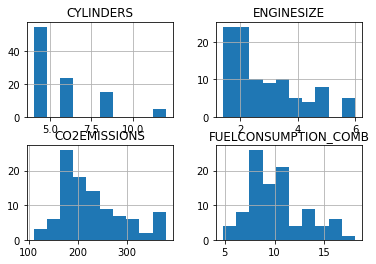

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


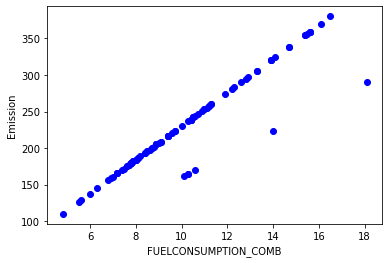

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

The above chart indicates that most of the data points are clustered in the lower half of the plot. The points located to the extreme right of the x-axis or the y-axis indicate outliers. 

## Outlier Identification

There can be many reasons for the presence of outliers in the data. Sometimes the outliers may be genuine, while in other cases, they could exist because of data entry errors. It is important to understand the reasons for the outliers before cleaning them.

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables. 

In [11]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2.801010,5.494949,11.647475,8.328283,10.156566,29.858586,228.444444
std,1.280027,2.106229,3.538140,2.015402,2.835171,8.176634,63.490835
min,1.400000,4.000000,4.700000,4.900000,4.800000,16.000000,110.000000
25%,2.000000,4.000000,8.950000,6.850000,7.950000,25.000000,179.000000
50%,2.400000,4.000000,11.200000,7.800000,9.600000,29.000000,216.000000
75%,3.500000,6.000000,13.350000,9.100000,11.300000,35.500000,259.000000
max,6.000000,12.000000,21.300000,14.100000,18.100000,59.000000,380.000000


## Activities
Change the data in Excel Dcoument. Remove some data, change the variable 

### Activity 1
Get the information of the data structure. Observe the data make notes of the missing data

In [ ]:
# write your code here

### Activity 2

Now, lets plot each of these features vs the Emission, to see how linear is their relation.
plot **CYLINDER** vs the **Emission**, to see how **linear** is their relation:. You just need to copy and paste the above code and then replace the feature cdf.ENGINESIZE to cdf.CYLINDER in line no 1. Then plot the label appropriately in line no 2:

In [8]:
# write your code here


plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()




In [ ]:
### Activity 2

plot **CYLINDER** vs the **Emission**, to see the outliers. You just need to copy and paste the above code and then replace the feature cdf.ENGINESIZE to cdf.CYLINDER in line no 1. Then plot the label appropriately in line no 2:


In [10]:
# write your code here


Double-click **here** for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->


#### Plot outputs


### Thank you for completing this lab!

This notebook is part of a course called Programming and Algorithm of the Data Science apprenticeship course. 
## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Dr Nazmul Hussain</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2021-06-30        | 2.1     | Tomi       | Updated lab link                   |
| 2020-06-30        | 2.0     | Simon      | Fixed Typo errors                  |

<hr>

## <h3 align="center"> © University of Nottingham. All rights reserved. <h3/>
